In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get data

In [20]:
df= pd.read_csv('../Data/Raw/supermarket.csv')

In [21]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [22]:
df.shape

(9800, 18)

# Data Cleaning

In [23]:
df.isnull().sum()/df.shape[0]*100
df=df.fillna(method="ffill")
df.isnull().sum()/df.shape[0]*100


C:\Users\ikhwa\AppData\Local\Temp\ipykernel_12032\2380904833.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method="ffill")


Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
dtype: float64

In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     3959 non-null   datetime64[ns]
 3   Ship Date      3815 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

# Univariate Analysis

### Apa itu analisis univariat?

Analisis univariat berfokus pada mempelajari satu variabel pada satu waktu, mengamati fitur dan polanya tanpa mempertimbangkan variabel lain. Tujuan utamanya adalah untuk memahami hal-hal seperti nilai rata-rata, seberapa menyebar data, pola yang terlihat, dan nilai yang tidak biasa dalam variabel tunggal tersebut. Analisis ini menggunakan statistik dan visual untuk memahami karakteristik titik data tertentu.

### Analysis of categorical data

#### Contplot

Countplot digunakan untuk memvisualisasikan jumlah setiap nilai unik yang ada di kolom

<Axes: xlabel='Segment', ylabel='count'>

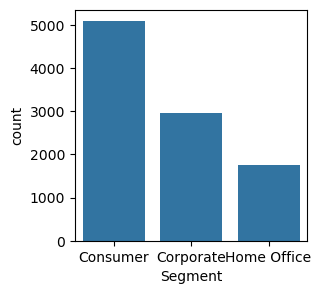

In [26]:
plt.figure(figsize=(3,3))
sns.countplot(x='Segment',data=df)

#### Piechart

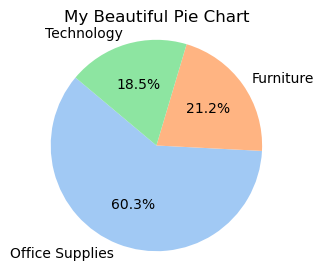

In [27]:

category_counts = df['Category'].value_counts()
# Let's take the category
categories = category_counts.index.tolist() 
# Let's take the count values of each category
counts = category_counts.values.tolist()

colors = sns.color_palette('pastel')[0:4]  # Using Seaborn's pastel color palette

# Create pie chart
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('My Beautiful Pie Chart')

# Show the plot
plt.show()


### Analisis pada data numerik

#### Histogram

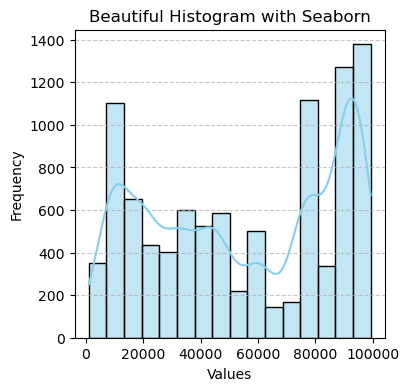

In [28]:
plt.figure(figsize=(4, 4))
sns.histplot(data=df['Postal Code'], kde=True, color='skyblue')
plt.title('Beautiful Histogram with Seaborn')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

##### Using hue parameter

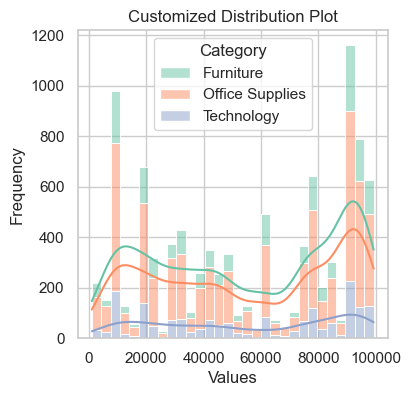

In [29]:
# Plotting a customized distplot using Seaborn
plt.figure(figsize=(4, 4))
sns.set(style="whitegrid")  # Setting Seaborn style

# Creating the distplot
sns.histplot(data=df, x='Postal Code', kde=True, hue='Category', palette='Set2', multiple='stack', bins=30)
plt.title('Customized Distribution Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()


#### Distplot

<Axes: xlabel='Postal Code', ylabel='Count'>

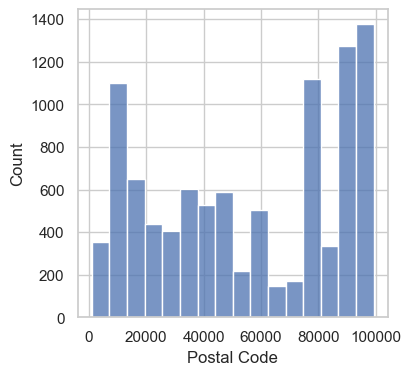

In [30]:
plt.figure(figsize=(4, 4))
sns.histplot(df['Postal Code'])

#### Boxplot

##### Boxplot untuk kolom tunggal

C:\Users\ikhwa\AppData\Local\Temp\ipykernel_12032\358055917.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['Postal Code'], palette='Set3')


<Axes: ylabel='Postal Code'>

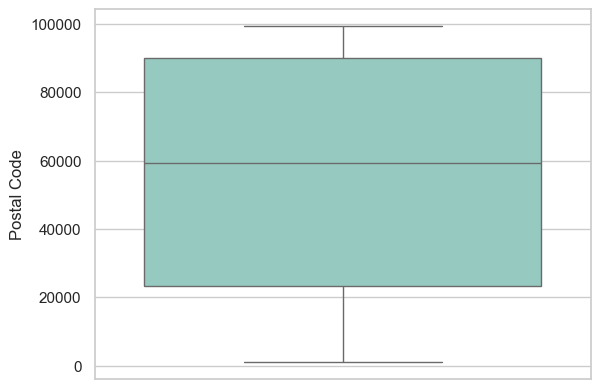

In [31]:
sns.boxplot(df['Postal Code'], palette='Set3')

##### Plotting boxplot for multiple numrical column 

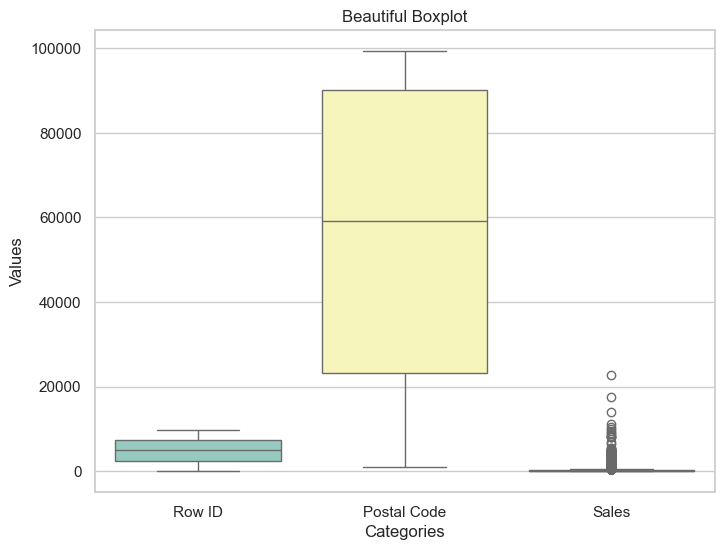

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, palette='Set3')
plt.title('Beautiful Boxplot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

# Bivariate analysis

Analisis bivariat adalah metode statistik yang melibatkan analisis dan pemahaman hubungan atau asosiasi antara dua variabel yang berbeda. Metode ini mengeksplorasi bagaimana perubahan dalam satu variabel dapat dikaitkan dengan perubahan pada variabel lain, memeriksa hubungan atau korelasinya untuk memperoleh wawasan dari interaksinya.

### Numerical - Numerical

#### Scatterplot 

<Axes: xlabel='Postal Code', ylabel='Sales'>

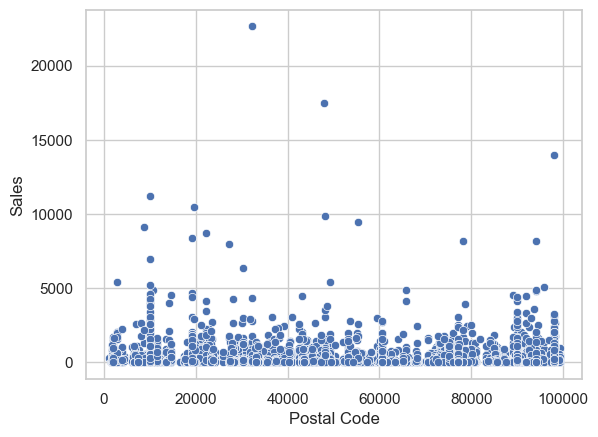

In [33]:
sns.scatterplot(data=df, x='Postal Code', y='Sales')

#### Lineplot

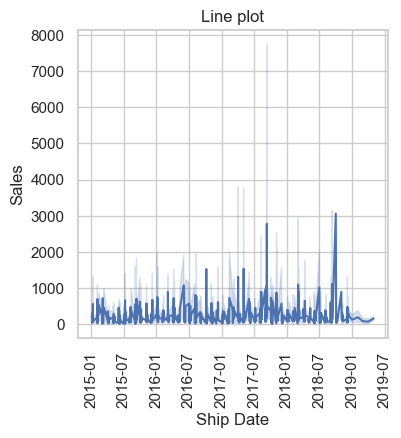

In [34]:
plt.figure(figsize=(4, 4))
sns.lineplot(data=df, x='Ship Date', y='Sales')
sns.set(style="darkgrid")
plt.title('Line plot')
plt.xticks(rotation=90) 
plt.show()


#### Lineplot using hue parameter

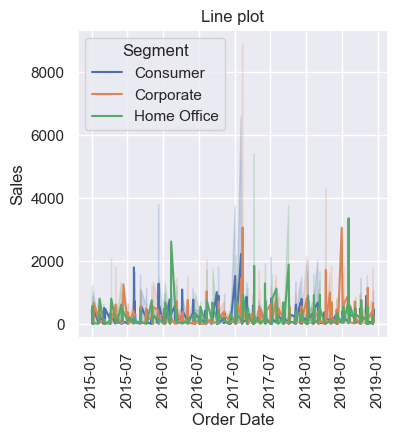

In [35]:
plt.figure(figsize=(4, 4))
sns.lineplot(x="Order Date",y="Sales",data=df,hue="Segment")
sns.set(style="darkgrid")
plt.title('Line plot')
plt.xticks(rotation=90) 
plt.show()

### Numerical- Categorical

#### Barplot

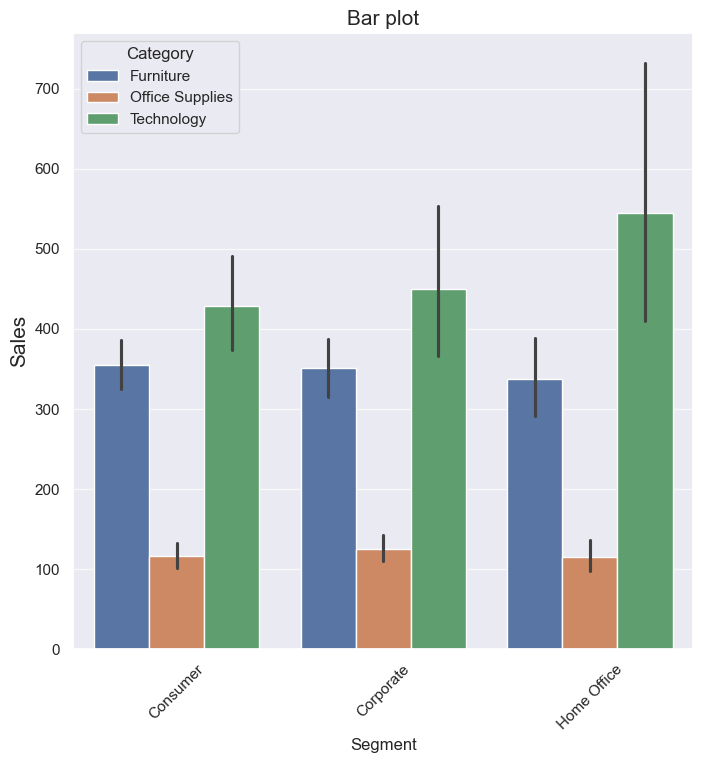

In [36]:
plt.figure(figsize=(8, 8))
sns.barplot(x="Segment",y="Sales",data=df,hue="Category")
plt.title("Bar plot",fontsize=15)
plt.xlabel("Segment",fontsize=12)
plt.ylabel("Sales",fontsize=15)
ax = plt.gca()
ax.grid(True, axis='y', linestyle='-', alpha=0.7) 
plt.xticks(rotation=45) 
plt.show()

#### Distplot

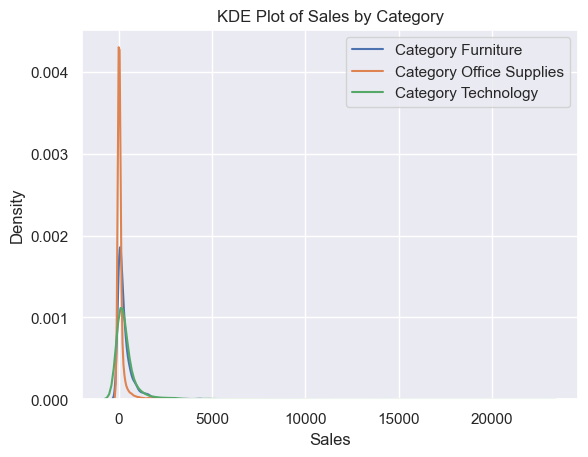

In [37]:
for category in df['Category'].unique():
        sns.kdeplot(df.loc[df['Category'] == category, 'Sales'], label=f'Category {category}')

plt.legend()
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('KDE Plot of Sales by Category')
plt.show()

### Categorical - Categorical

#### Heatmap

<Axes: xlabel='Ship Mode', ylabel='Category'>

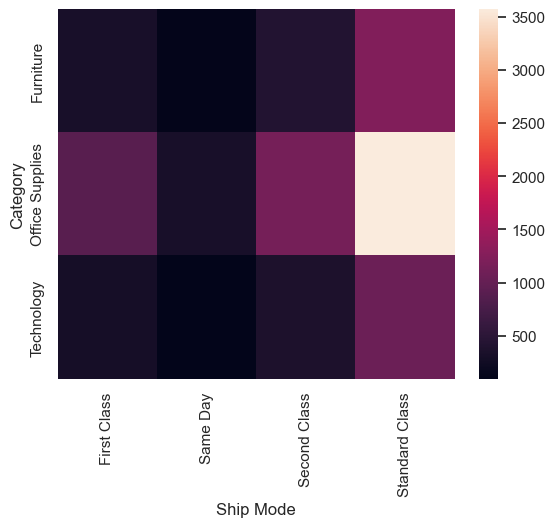

In [38]:
sns.heatmap(pd.crosstab(df['Category'],df['Ship Mode']))

#### ClusterMap

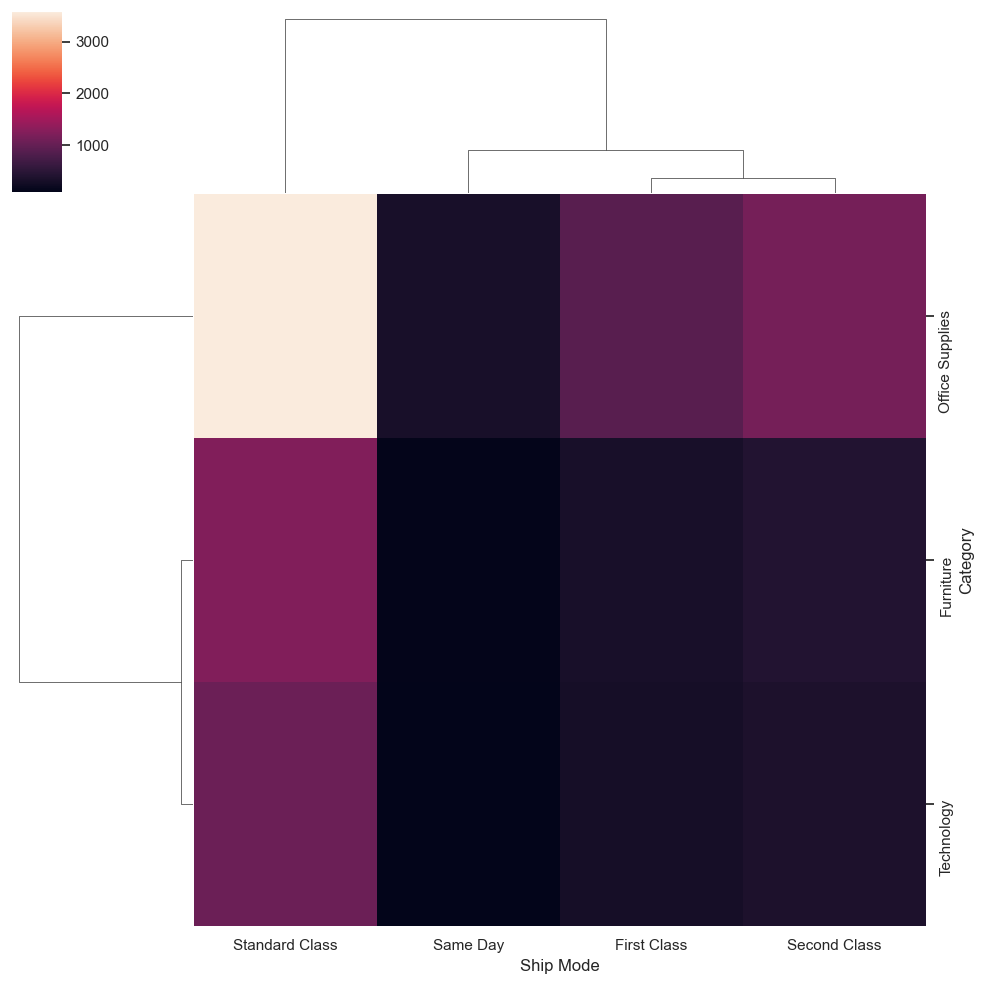

In [39]:
sns.clustermap(pd.crosstab(df['Category'],df['Ship Mode']))

#### Pairplot

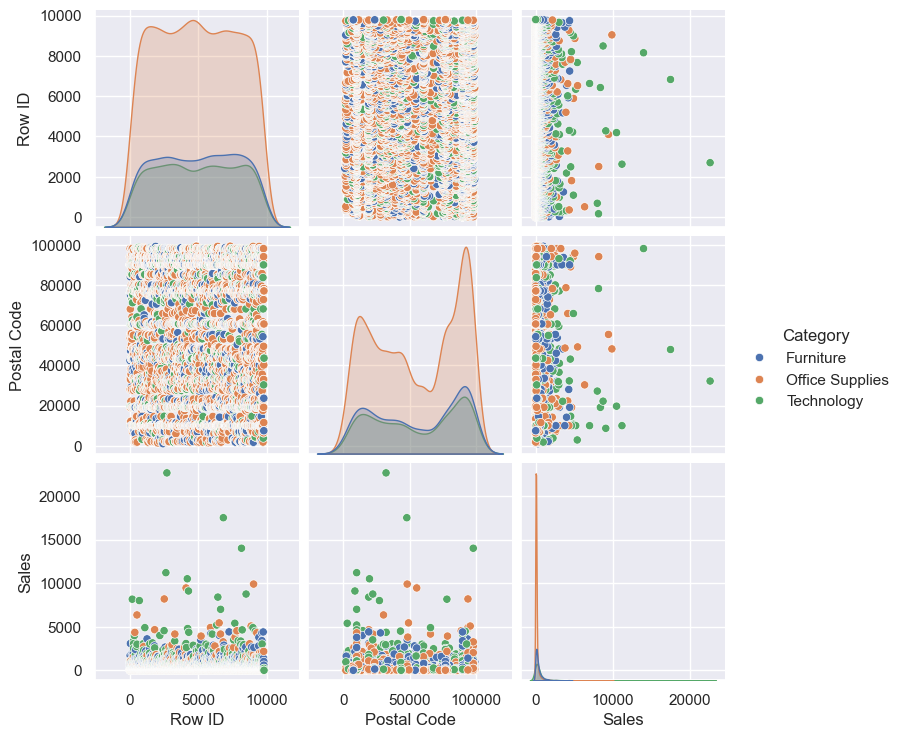

In [40]:
sns.pairplot(df,hue='Category')

# Plot using aggregate function

In [41]:
result1 = df.groupby('Category')['Postal Code'].agg(['mean', 'max', 'min']).reset_index()
result1


,Category,mean,max,min
0,Furniture,55659.680943,99301.0,1040.0
1,Office Supplies,55054.481469,99301.0,1453.0
2,Technology,55664.466630,99207.0,1841.0


In [42]:
result2 = df.groupby('Category')['Sales'].agg(['mean', 'max', 'min']).reset_index()
result2


,Category,mean,max,min
0,Furniture,350.653790,4416.174,1.892
1,Office Supplies,119.381001,9892.740,0.444
2,Technology,456.401474,22638.480,0.990


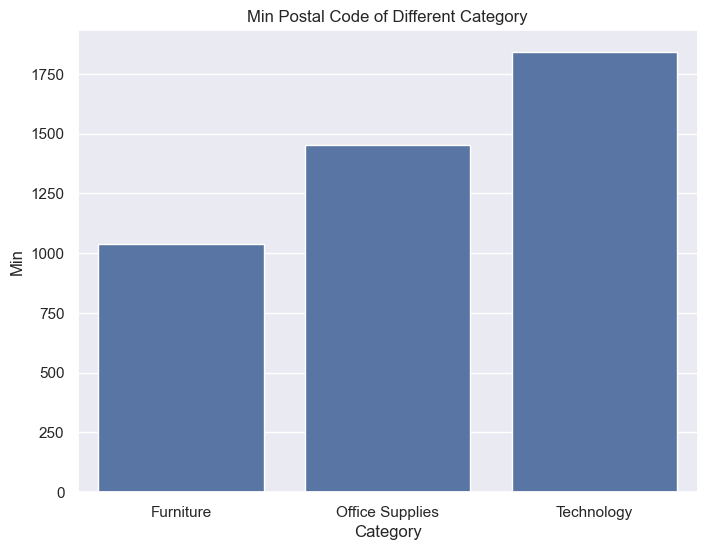

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(data=result1, x='Category', y='min')
plt.title('Min Postal Code of Different Category')
plt.xlabel('Category')
plt.ylabel('Min')
plt.show()


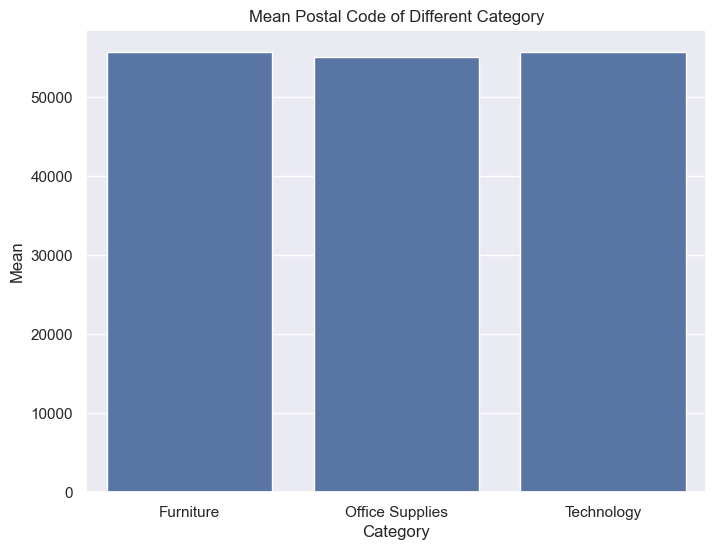

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(data=result1, x='Category', y='mean')
plt.title('Mean Postal Code of Different Category')
plt.xlabel('Category')
plt.ylabel('Mean')
plt.show()

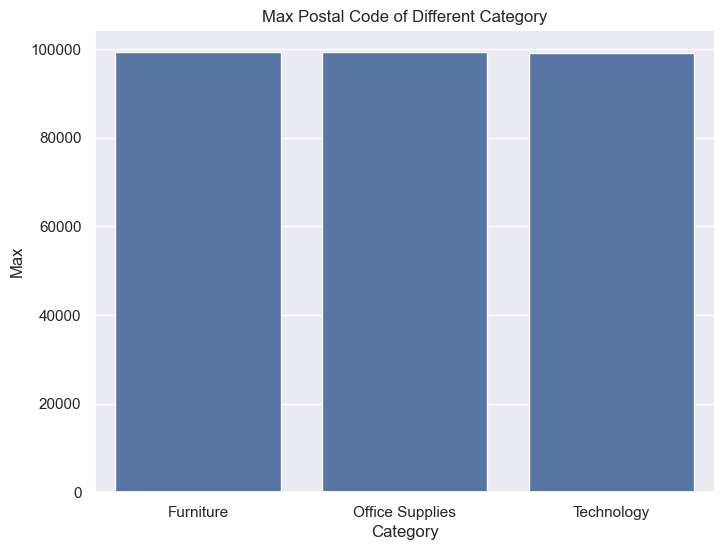

In [45]:
plt.figure(figsize=(8, 6))
sns.barplot(data=result1, x='Category', y='max')
plt.title('Max Postal Code of Different Category')
plt.xlabel('Category')
plt.ylabel('Max')
plt.show()


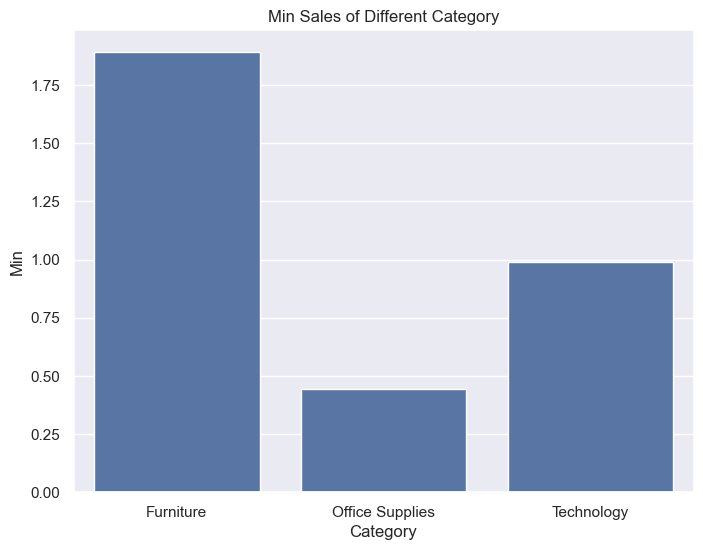

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(data=result2, x='Category', y='min')
plt.title('Min Sales of Different Category')
plt.xlabel('Category')
plt.ylabel('Min')
plt.show()

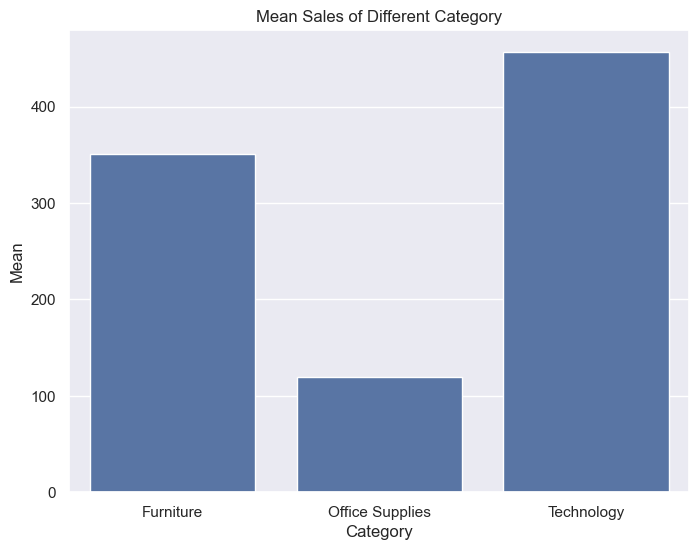

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(data=result2, x='Category', y='mean')
plt.title('Mean Sales of Different Category')
plt.xlabel('Category')
plt.ylabel('Mean')
plt.show()

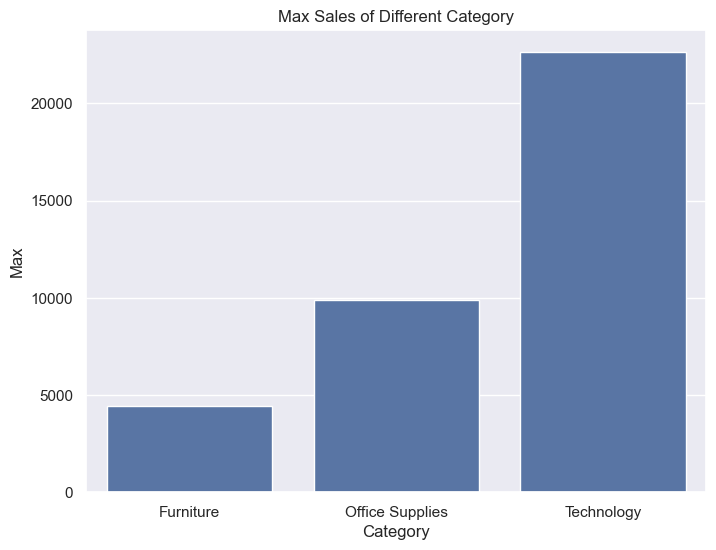

In [48]:
plt.figure(figsize=(8, 6))
sns.barplot(data=result2, x='Category', y='max')
plt.title('Max Sales of Different Category')
plt.xlabel('Category')
plt.ylabel('Max')
plt.show()

# Plotting using groupby

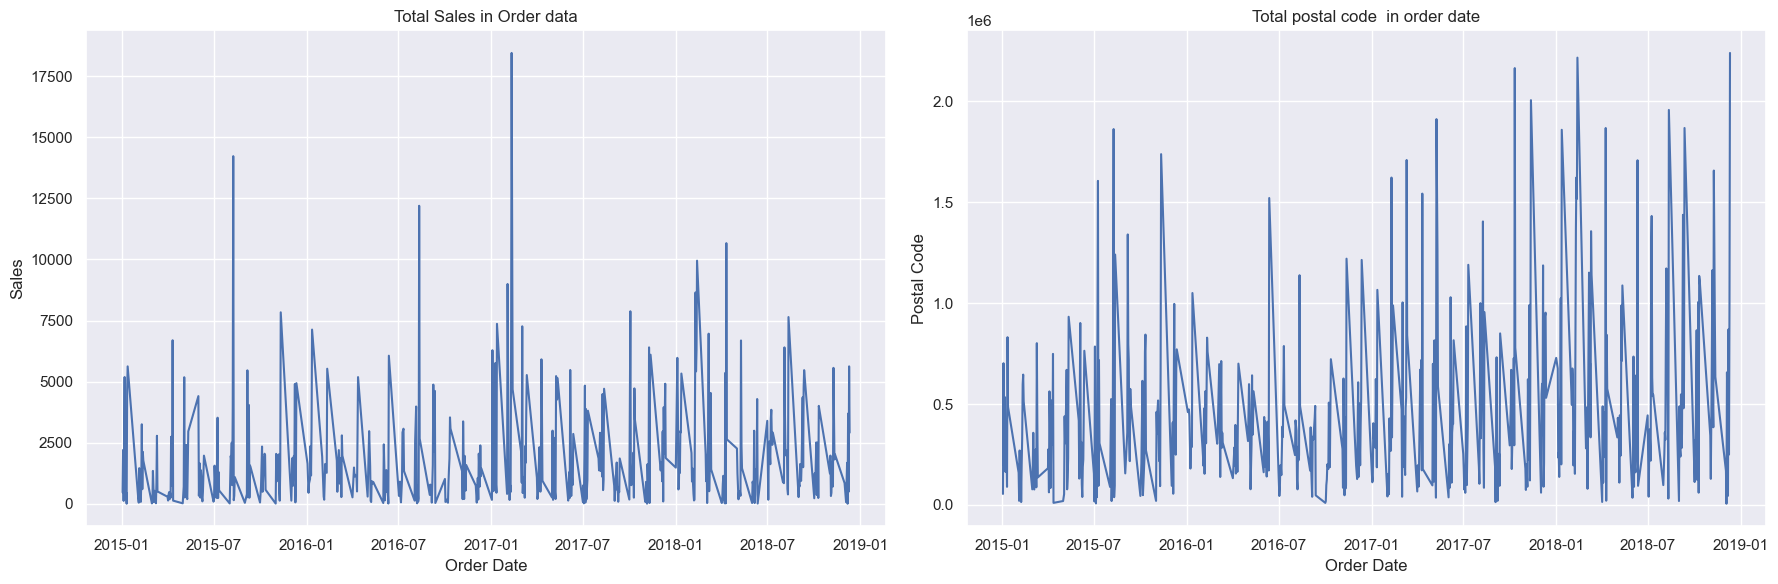

In [49]:
g1 =df.groupby(['Order Date'])['Sales'].sum().reset_index()
g1=g1.sort_index(ascending=False)

g2 =df.groupby(['Order Date'])['Postal Code'].sum().reset_index()
g2=g2.sort_index(ascending=False)


fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Here 3 means row and 2 means column


sns.lineplot(ax=axes[0],data=g1, x='Order Date', y='Sales')
axes[0].set_title('Total Sales in Order data')


sns.lineplot(ax=axes[1],data=g2, x='Order Date', y='Postal Code')
axes[1].set_title('Total postal code  in order date')


plt.tight_layout()
plt.show()
                 
                 
                